# Finans Projekt 1 - English
This notebook is for assistance with the coding for many of the questions in the project.
The sections are marked with the corresponding question in the Project description.
Remember, this code is provided to get started with the project, but the code is not complete for answering the corresponding questions

#### Initialize python packages

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Read Data

In [2]:

# path to project data (replace with your own path)
file_path = 'finans1_data.csv'

## Read data into a pandas DataFrame
D = pd.read_csv(file_path, delimiter=";")
## Keep only the dates and the ETFs AGG, VAW, IWN, and SPY
D = D.loc[:, ["t", "AGG", "VAW", "IWN", "SPY"]]

#### a) Simple summary of data

In [3]:
print(f"Dimension of DataFrame: {D.shape}") # f-strings allow us to insert variables directly into the string
print(f"Variable names: {D.columns}")
print("\nFirst few rows of DataFrame:") # \n is the newline character for strings
display(D.head())
print("Last row of DataFrame:")
display(D.tail())
print("Some summary statistics:")
display(D.describe())
print("Data types:", D.dtypes)

Dimension of DataFrame: (454, 5)
Variable names: Index(['t', 'AGG', 'VAW', 'IWN', 'SPY'], dtype='object')

First few rows of DataFrame:


,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
1,2006-5-12,-0.003675,-0.027460,-0.048072,-0.024751
2,2006-5-19,0.006661,-0.050000,-0.014096,-0.016558
3,2006-5-26,0.001832,0.012539,0.009717,0.010071
4,2006-6-5,-0.004775,-0.022321,-0.017734,-0.009815


Last row of DataFrame:


,t,AGG,VAW,IWN,SPY
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
450,2015-4-17,0.003775,-0.003171,-0.010406,-0.009950
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793
452,2015-5-1,-0.010404,0.014923,-0.023800,-0.004394
453,2015-5-8,-0.000453,0.004074,0.002566,0.004271


Some summary statistics:


,AGG,VAW,IWN,SPY
count,454.000000,454.000000,454.000000,454.000000
mean,0.000266,0.001794,0.001188,0.001360
std,0.005976,0.036083,0.032015,0.024786
min,-0.029604,-0.203660,-0.179655,-0.137598
25%,-0.002973,-0.016096,-0.014305,-0.011325
50%,0.000237,0.004798,0.003120,0.004216
75%,0.003893,0.019685,0.019056,0.014498
max,0.030507,0.142977,0.126702,0.083276


Data types: t       object
AGG    float64
VAW    float64
IWN    float64
SPY    float64
dtype: object


#### b) Histogram (empirical density)

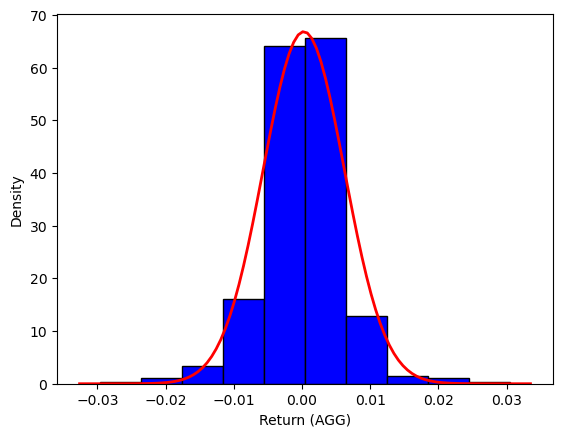

In [4]:
## Histogram describing the empirical density of the weekly returns from
## AGG (histogram of weekly returns normalized to have an area of 1)
plt.hist(D['AGG'].dropna(), bins=10, density=True, color='blue', edgecolor='black') # dropna() removes potential missing values


# Get the mean and standard deviation of the data
mu, std = stats.norm.fit(D['AGG'].dropna()) 

# Plotting the normal distribution curve
xmin, xmax = plt.xlim()  # Getting the current x-axis limits
x = np.linspace(xmin, xmax, 100)  # Generating 100 points between the min and max x values
p = stats.norm.pdf(x, mu, std)  # Getting the normal probability density function values

# Plot the PDF (red line)
plt.plot(x, p, 'r', linewidth=2)

#adding the labels
plt.xlabel('Return (AGG)')
plt.ylabel('Density')

#saving as a pocture
plt.savefig('histogram_with_normal_curve.png', dpi=300, bbox_inches='tight')  # Save with 300 DPI


# Show the plot
plt.show()


#### Date variable t

In [5]:
# Converts the variable 't' to a date variable
D['t'] = pd.to_datetime(D['t']) 
# to_datetime() method converts string to a datetime pandas object. 
# This is necesary to make it ordinal
display(D['t'].describe())

count                              454
mean     2010-11-05 08:37:00.264317184
min                2006-05-05 00:00:00
25%                2008-08-05 18:00:00
50%                2010-11-04 12:00:00
75%                2013-02-06 06:00:00
max                2015-05-08 00:00:00
Name: t, dtype: object

#### c) Plots of data over time 

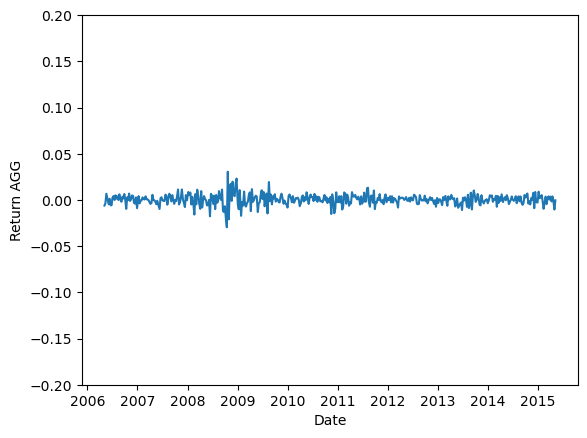

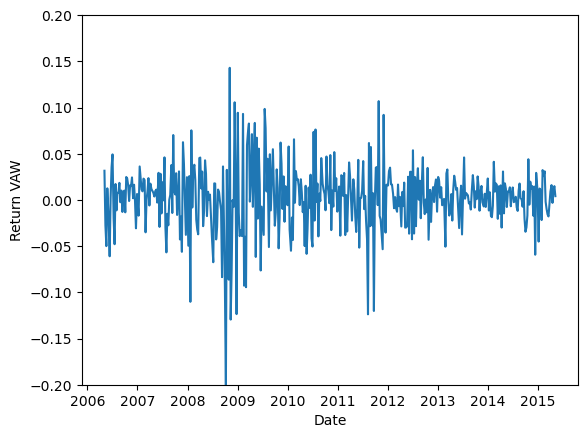

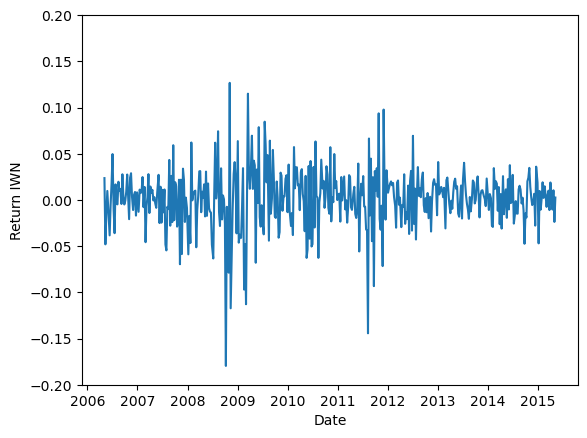

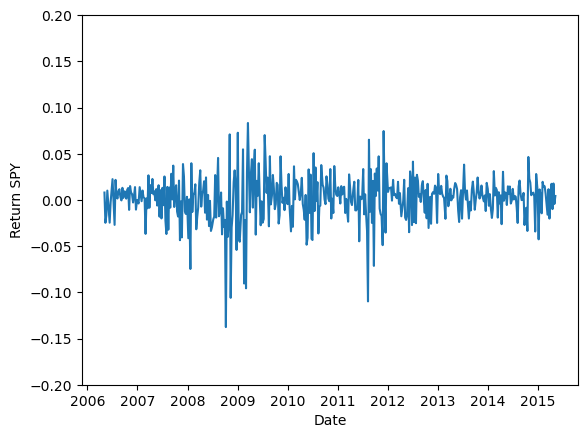

In [6]:
## Plot of weekly return over time for AGG
ylim = (-0.2, 0.2)
plt.plot(D['t'], D['AGG'], label='AGG')
plt.ylim(ylim)
plt.xlabel("Date")
plt.ylabel("Return AGG")

plt.savefig('figure_2_AGG_development.png', dpi=300, bbox_inches='tight')  # Save the figure
plt.show()


## Similar plots for the three other ETFs
for etf in ['VAW', 'IWN', 'SPY']:
    plt.plot(D['t'], D[etf], label=etf)
    plt.ylim(ylim)
    plt.xlabel("Date")
    plt.ylabel(f"Return {etf}")
    plt.savefig(f'figure_{etf}_development.png', dpi=300, bbox_inches='tight')  # Save the figure
    plt.show()

#### d) Box plots by ETF

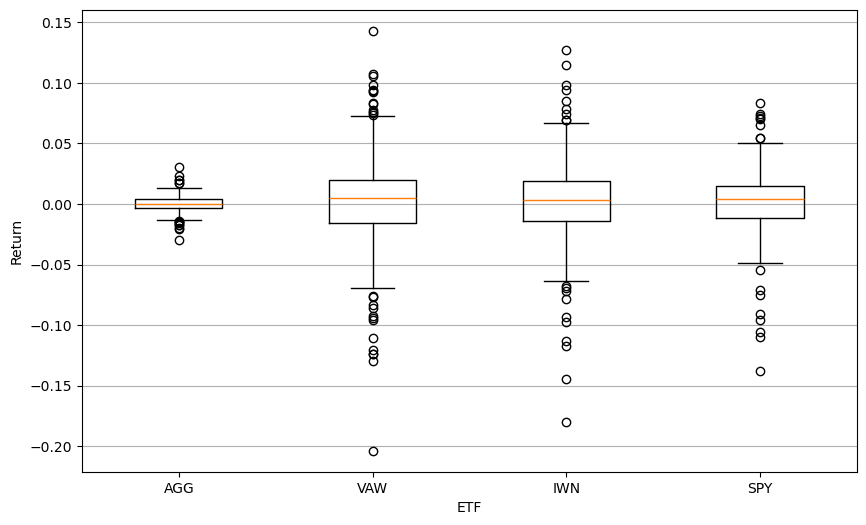

In [7]:
etfs = ['AGG', 'VAW', 'IWN', 'SPY']

plt.figure(figsize=(10, 6))
plt.boxplot([D['AGG'],D['VAW'],D['IWN'],D['SPY']], labels=etfs)
plt.xlabel("ETF")
plt.ylabel("Return")
plt.grid(axis='y')
plt.savefig('figure_6_boxplot_of_returns.png', dpi=300, bbox_inches='tight')  # Save the figure
plt.show()

#### e) Key summary statistics for AGG

In [8]:
print(f"Total number of observations (without missing values): {D['AGG'].notna().sum()}")
print(f"Sample mean of weekly returns: {np.mean(D['AGG'])}")
print(f"Sample variance of weekly returns: {np.var(D['AGG'], ddof=1)}") # ddof=1 as we want the *sample* variance

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.00026575697622256976
Sample variance of weekly returns: 3.57106780351428e-05


#### f) QQ-plot for model validation

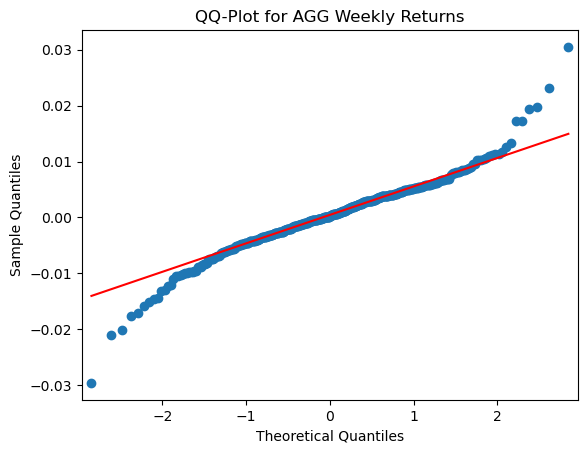

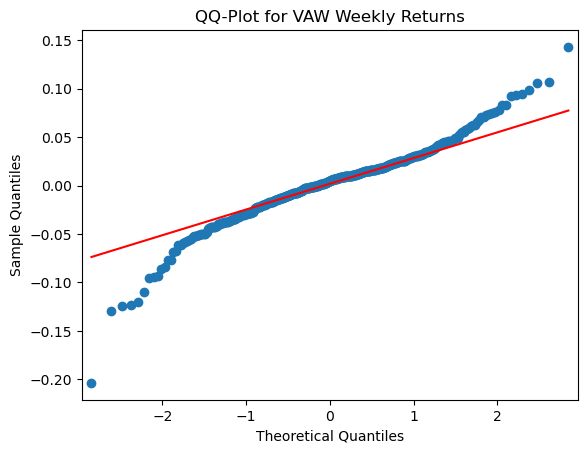

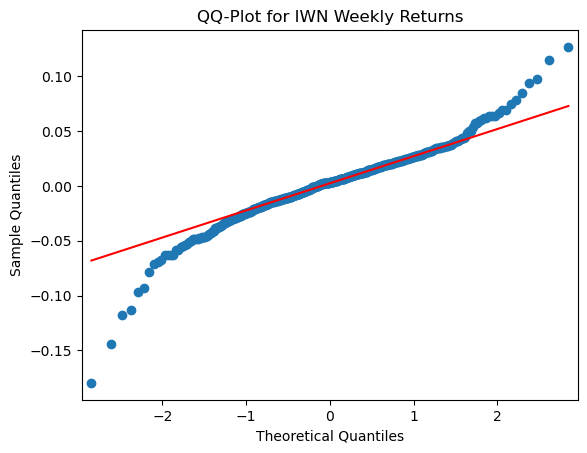

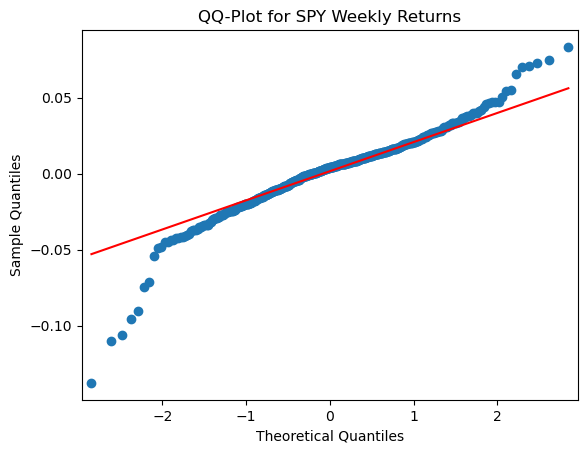

In [9]:

# List of ETFs to validate
etfs = ['AGG', 'VAW', 'IWN', 'SPY']

# Create QQ-plots for each ETF
for etf in etfs:
    # Dropping missing values and create QQ-plot
    sm.qqplot(D[etf].dropna(), line='q')
    plt.title(f'QQ-Plot for {etf} Weekly Returns')
    plt.show()


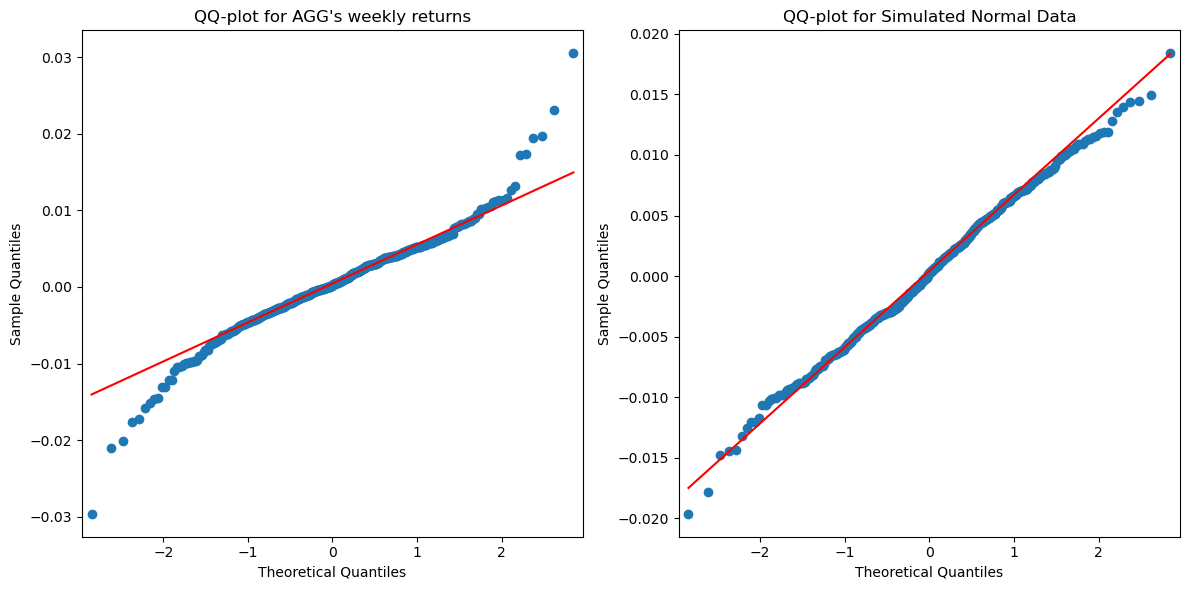

In [10]:


# Example for AGG
data = D['AGG'].dropna()

# Generate simulated data from normal distribution
np.random.seed(31415)
sim_data = np.random.normal(loc=data.mean(), scale=data.std(ddof=1), size=len(data))

# Plot QQ plot for observed data
plt.figure(figsize=(12, 6))

# Subplot 1: QQ plot for actual data
plt.subplot(1, 2, 1)
sm.qqplot(data, line='q', ax=plt.gca())
plt.title("QQ-plot for AGG's weekly returns")

# Subplot 2: QQ plot for simulated data
plt.subplot(1, 2, 2)
sm.qqplot(sim_data, line='q', ax=plt.gca())
plt.title("QQ-plot for Simulated Normal Data")

plt.tight_layout()
plt.show()


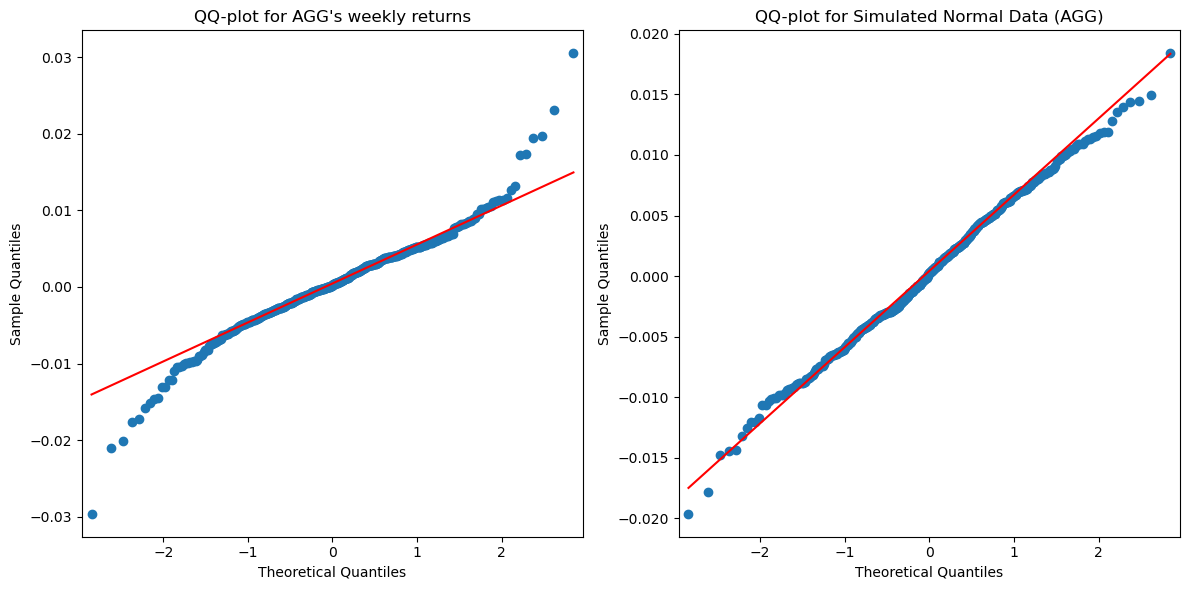

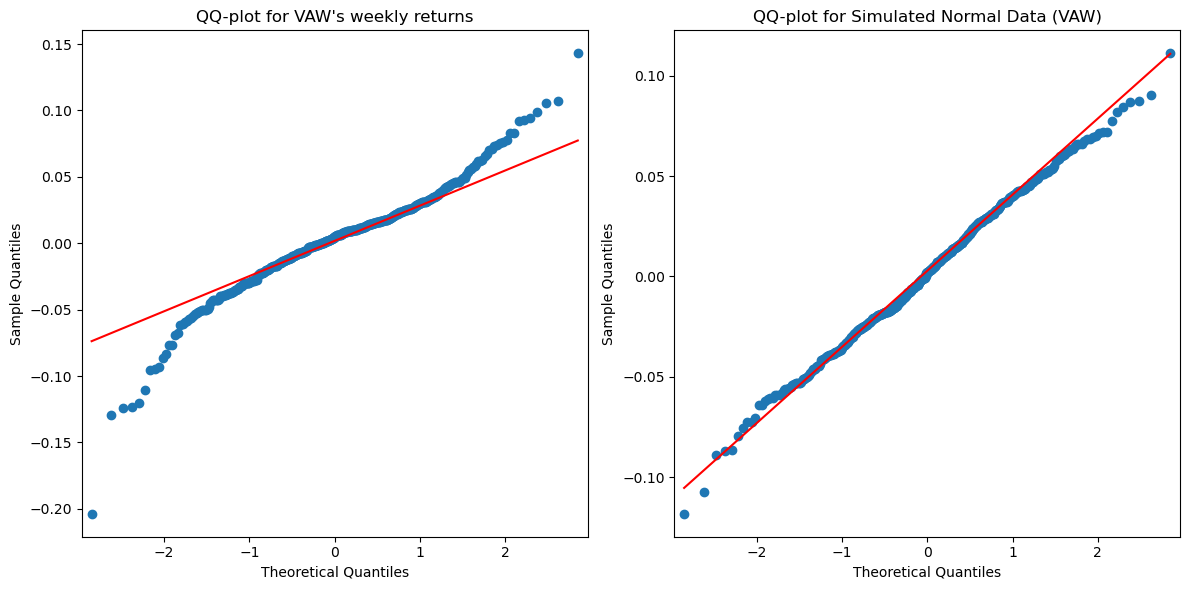

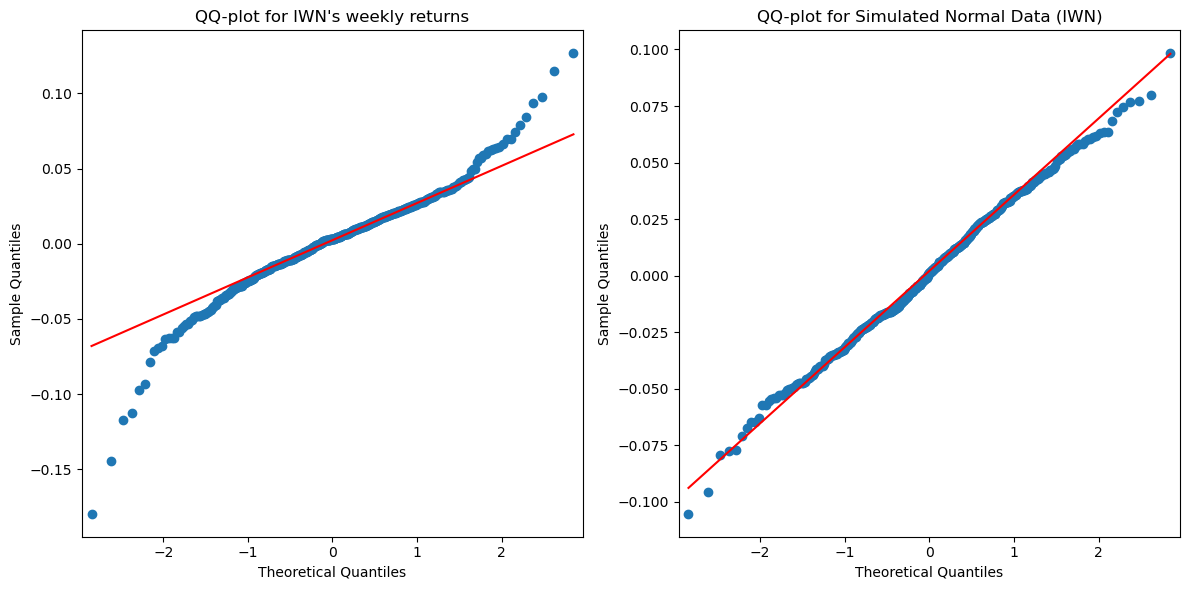

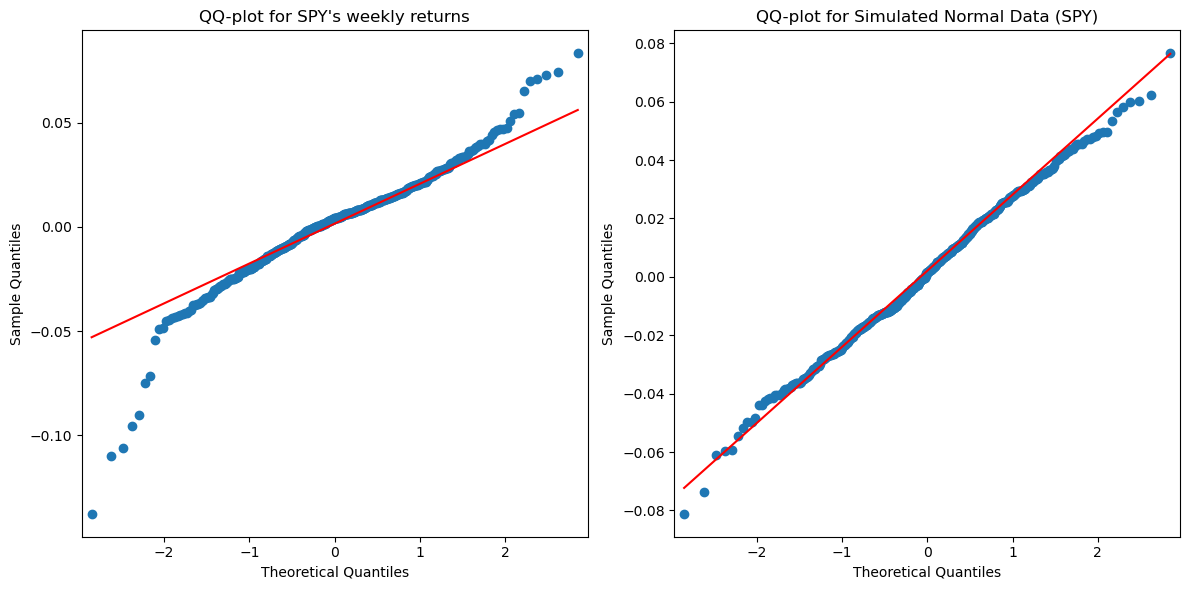

In [11]:


# List of ETFs to process
etfs = ['AGG', 'VAW', 'IWN', 'SPY']

# Loop through each ETF
for etf in etfs:
    data = D[etf].dropna()  # Get observed data

    # Generate simulated data from normal distribution
    np.random.seed(31415)
    sim_data = np.random.normal(loc=data.mean(), scale=data.std(ddof=1), size=len(data))

    # Create a figure with two subplots (one for observed, one for simulated)
    plt.figure(figsize=(12, 6))

    # Subplot 1: QQ plot for observed data
    plt.subplot(1, 2, 1)
    sm.qqplot(data, line='q', ax=plt.gca())
    plt.title(f"QQ-plot for {etf}'s weekly returns")

    # Subplot 2: QQ plot for simulated data
    plt.subplot(1, 2, 2)
    sm.qqplot(sim_data, line='q', ax=plt.gca())
    plt.title(f"QQ-plot for Simulated Normal Data ({etf})")

    
    plt.tight_layout()
    plt.show()


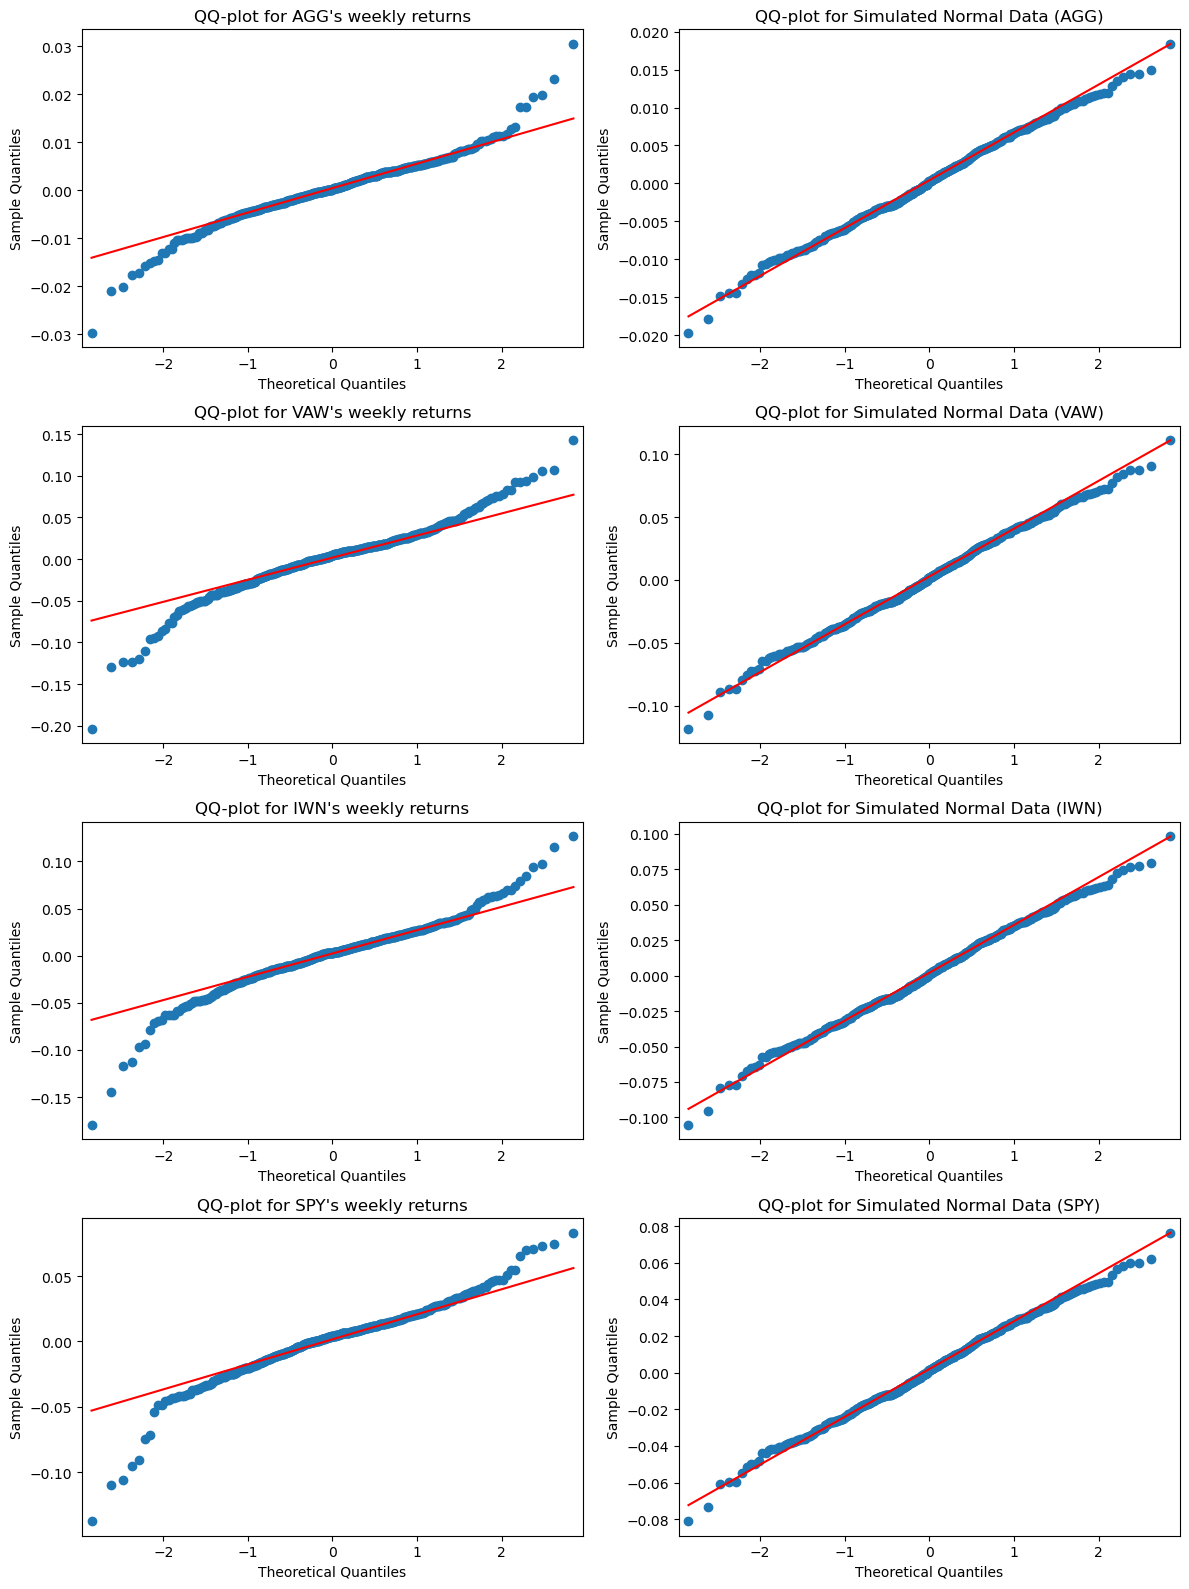

In [12]:


# List of ETFs to process
etfs = ['AGG', 'VAW', 'IWN', 'SPY']

# Creating a figure with 4 rows and 2 columns (one for observed, one for simulated for each ETF)
fig, axs = plt.subplots(4, 2, figsize=(12, 16))  # 4x2 grid

# Loop through each ETF
for i, etf in enumerate(etfs):
    data = D[etf].dropna()  # Get observed data

    # Generate simulated data from normal distribution
    np.random.seed(31415)
    sim_data = np.random.normal(loc=data.mean(), scale=data.std(ddof=1), size=len(data))

    # Subplot 1: QQ plot for observed data
    sm.qqplot(data, line='q', ax=axs[i, 0])
    axs[i, 0].set_title(f"QQ-plot for {etf}'s weekly returns")

    # Subplot 2: QQ plot for simulated data
    sm.qqplot(sim_data, line='q', ax=axs[i, 1])
    axs[i, 1].set_title(f"QQ-plot for Simulated Normal Data ({etf})")


plt.tight_layout()
plt.savefig('figure_7_QQ_plots.png', dpi=300, bbox_inches='tight')  # Save the figure
plt.show()


#### g-h) One-sample t-test

In [14]:
# Test hypothesis mu = 0 for AGG's weekly returns
res_AGG = stats.ttest_1samp(D['AGG'], popmean=0)
res_VAW = stats.ttest_1samp(D['VAW'], popmean=0)
res_IWN = stats.ttest_1samp(D['IWN'], popmean=0)
res_SPY = stats.ttest_1samp(D['SPY'], popmean=0)


# Confidence interval
print(res_AGG.confidence_interval())
print(res_VAW.confidence_interval())
print(res_IWN.confidence_interval())
print(res_SPY.confidence_interval())


# Number of observations
n = 454
df = n - 1  # Degrees of freedom

# Calculate the t-quantile for a 95% confidence interval
t_value = stats.t.ppf(0.975, df=df)

# Display the result
print(t_value)




ConfidenceInterval(low=-0.00028540734518444, high=0.0008169212976295796)
ConfidenceInterval(low=-0.0015342078012798403, high=0.005121788040169244)
ConfidenceInterval(low=-0.0017651741507074973, high=0.004140532646420902)
ConfidenceInterval(low=-0.0009259600489804174, high=0.0036461709486724178)
1.9652145681681557


In [49]:
from scipy import stats
import numpy as np

# Sample data for AGG
data_agg = D['AGG'].dropna()  # Assuming 'D' is your dataset

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(data_agg, 0)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 0.9475749082082546
P-value: 0.3438511026649561


#### i) Welch t-test

In [11]:
# Comaring the mean weekly returns of VAW and AGG
res = stats.ttest_ind(D['VAW'].dropna(), D['AGG'].dropna(), equal_var=False)
print(f"Test statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

Test statistic: 0.8901925966613312
P-value: 0.3738104498113183


In [50]:


# Sample means and standard deviations from previous sections
mean_vaw = 0.001794
mean_agg = 0.000266
std_vaw = 0.036083
std_agg = 0.005976

# Sample sizes
n_vaw = 454
n_agg = 454

# Pooled standard deviation
sp = np.sqrt(((n_vaw - 1) * std_vaw**2 + (n_agg - 1) * std_agg**2) / (n_vaw + n_agg - 2))

# Test statistic
t_statistic = (mean_vaw - mean_agg) / (sp * np.sqrt(1/n_vaw + 1/n_agg))

# Degrees of freedom
df = n_vaw + n_agg - 2

# Calculating the p-value for a two-sided t-test
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

# Output the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 0.8901693839590077
P-value: 0.3736112513751193


#### k) Correlation

In [12]:
# Computing the  correlation between selected ETFs
correlation_matrix = D[["AGG", "VAW", "IWN", "SPY"]].corr()
display(correlation_matrix)

,AGG,VAW,IWN,SPY
AGG,1.000000,-0.197568,-0.135262,-0.218716
VAW,-0.197568,1.000000,0.851641,0.886361
IWN,-0.135262,0.851641,1.000000,0.910097
SPY,-0.218716,0.886361,0.910097,1.000000


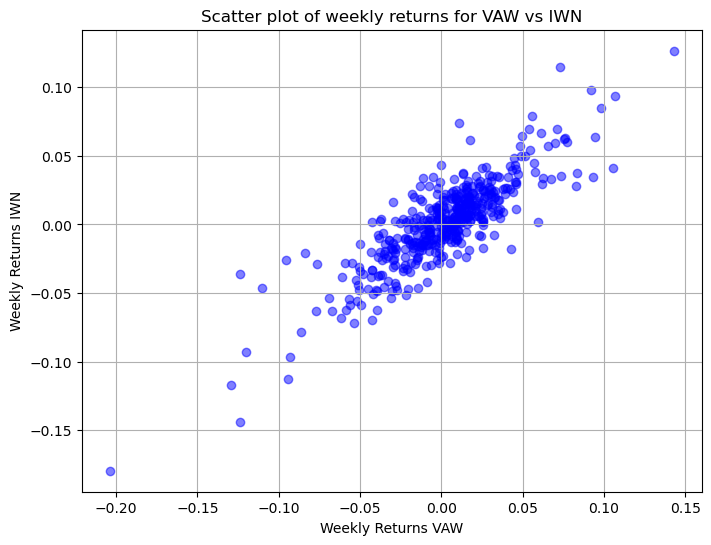

In [51]:
#Scatterplot


# Scatter plot of weekly returns for VAW vs IWN
plt.figure(figsize=(8, 6))
plt.scatter(D['VAW'], D['IWN'], color='blue', alpha=0.5)

# Adding title and labels
plt.title('Scatter plot of weekly returns for VAW vs IWN')
plt.xlabel('Weekly Returns VAW')
plt.ylabel('Weekly Returns IWN')


plt.grid(True)
plt.show()


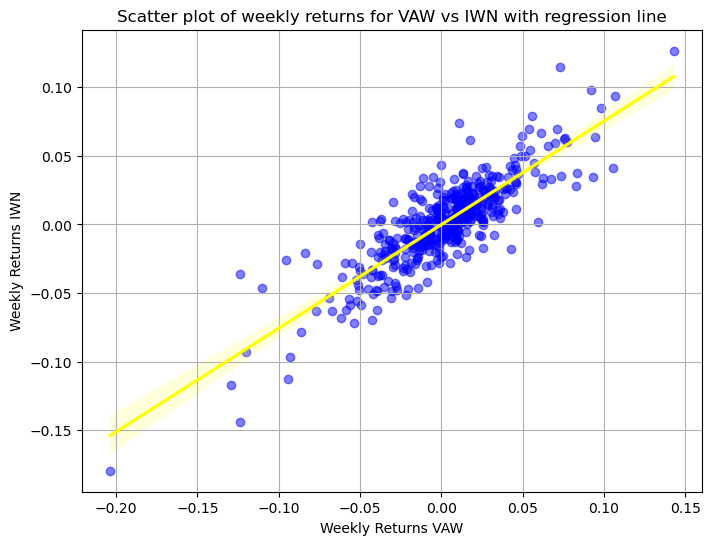

In [55]:
import seaborn as sns


# Creating scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=D['VAW'], y=D['IWN'], scatter_kws={'color': 'blue', 'alpha':0.5}, line_kws={'color': 'yellow'})

# Addinging title and labels
plt.title('Scatter plot of weekly returns for VAW vs IWN with regression line')
plt.xlabel('Weekly Returns VAW')
plt.ylabel('Weekly Returns IWN')


plt.grid(True)
plt.savefig('figure_8_scatter_plot.png', dpi=300, bbox_inches='tight')  # Save the figure
plt.show()


## EXTRA
#### Subsets in Python

In [13]:
## df['AGG'] < 0 returns all observations where AGG is negative
## Can be used to extract all AGG losses
loss_weeks = D['AGG'] < 0
agg_losses = D['AGG'][loss_weeks]
print("Weeks with negative returns in AGG:")
display(agg_losses)

## Alternatively, use the 'query' method
agg_losses_query = D.query('AGG < 0')
print("Weeks with negative returns in AGG (query method):")
display(agg_losses_query)
# Or use the 'loc' method
agg_losses_loc = D.loc[D['AGG'] < 0, 'AGG']
print("Weeks with negative returns in AGG (loc method):")
display(agg_losses_loc)

## More complex logical expressions can be made, e.g.:
## Find all observations from weeks where AGG had a loss and SPY had a gain
agg_loss_spy_gain = D.query('AGG < 0 & SPY > 0')
print("Weeks with negative AGG returns and positive SPY returns:")
display(agg_loss_spy_gain)

# "display()" function gives a nicer table than print. It is 
# especially useful when working with dataframes (pandas)

Weeks with negative returns in AGG:


0     -0.006088
1     -0.003675
4     -0.004775
6     -0.005812
7     -0.005744
         ...   
444   -0.004508
449   -0.001615
451   -0.001522
452   -0.010404
453   -0.000453
Name: AGG, Length: 214, dtype: float64

Weeks with negative returns in AGG (query method):


,t,AGG,VAW,IWN,SPY
0,2006-05-05,-0.006088,0.031573,0.023603,0.007987
1,2006-05-12,-0.003675,-0.027460,-0.048072,-0.024751
4,2006-06-05,-0.004775,-0.022321,-0.017734,-0.009815
6,2006-06-19,-0.005812,0.001998,-0.005530,-0.002581
7,2006-06-26,-0.005744,0.035400,0.017855,0.010674
...,...,...,...,...,...
444,2015-03-05,-0.004508,-0.009821,-0.007532,-0.004352
449,2015-04-10,-0.001615,0.016019,0.000193,0.017438
451,2015-04-24,-0.001522,0.011181,0.010418,0.017793
452,2015-05-01,-0.010404,0.014923,-0.023800,-0.004394


Weeks with negative returns in AGG (loc method):


0     -0.006088
1     -0.003675
4     -0.004775
6     -0.005812
7     -0.005744
         ...   
444   -0.004508
449   -0.001615
451   -0.001522
452   -0.010404
453   -0.000453
Name: AGG, Length: 214, dtype: float64

Weeks with negative AGG returns and positive SPY returns:


,t,AGG,VAW,IWN,SPY
0,2006-05-05,-0.006088,0.031573,0.023603,0.007987
7,2006-06-26,-0.005744,0.035400,0.017855,0.010674
14,2006-08-15,-0.000101,0.007605,0.019658,0.009575
22,2006-10-11,-0.009680,0.024822,0.008839,0.001408
24,2006-10-25,-0.000201,0.015830,0.004393,0.012885
...,...,...,...,...,...
441,2015-02-11,-0.009559,0.025773,0.002199,0.014064
442,2015-02-19,-0.003067,0.030951,0.014759,0.014739
449,2015-04-10,-0.001615,0.016019,0.000193,0.017438
451,2015-04-24,-0.001522,0.011181,0.010418,0.017793


#### Additional Python tips - used for table in e

In [38]:
## Make a for loop to calculate some summary 
## statistics and save the result in a new data frame
Tbl = pd.DataFrame()
for i in ['AGG', 'VAW', 'IWN', 'SPY']:
    Tbl.loc[i, "Number of obs."] = D[i].count()  # Number of observations
    Tbl.loc[i, "Sample mean"] = D[i].mean()  # Sample mean
    Tbl.loc[i, "Sample variance"] = D[i].var(ddof=1)  # Sample variance
    Tbl.loc[i, "Std. dev."] = D[i].std(ddof=1)  # Standard deviation
    Tbl.loc[i, "Lower quartile (Q1)"] = D[i].quantile(0.25)  # 1st quartile
    Tbl.loc[i, "Median (Q2)"] = D[i].median()  # Median (2nd quartile)
    Tbl.loc[i, "Upper quartile (Q3)"] = D[i].quantile(0.75)  # 3rd quartile
    
# show
display(Tbl)
Tbl_latex = Tbl.to_latex()
print(Tbl_latex)


,Number of obs.,Sample mean,Sample variance,Std. dev.,Lower quartile (Q1),Median (Q2),Upper quartile (Q3)
AGG,454.0,0.000266,0.000036,0.005976,-0.002973,0.000237,0.003893
VAW,454.0,0.001794,0.001302,0.036083,-0.016096,0.004798,0.019685
IWN,454.0,0.001188,0.001025,0.032015,-0.014305,0.003120,0.019056
SPY,454.0,0.001360,0.000614,0.024786,-0.011325,0.004216,0.014498


\begin{tabular}{lrrrrrrr}
\toprule
 & Number of obs. & Sample mean & Sample variance & Std. dev. & Lower quartile (Q1) & Median (Q2) & Upper quartile (Q3) \\
\midrule
AGG & 454.000000 & 0.000266 & 0.000036 & 0.005976 & -0.002973 & 0.000237 & 0.003893 \\
VAW & 454.000000 & 0.001794 & 0.001302 & 0.036083 & -0.016096 & 0.004798 & 0.019685 \\
IWN & 454.000000 & 0.001188 & 0.001025 & 0.032015 & -0.014305 & 0.003120 & 0.019056 \\
SPY & 454.000000 & 0.001360 & 0.000614 & 0.024786 & -0.011325 & 0.004216 & 0.014498 \\
\bottomrule
\end{tabular}



In [15]:
# There are many other ways to do these calculations, some more concise. For example
# Calculate mean and variance for all columns but 't'
result = D.drop(columns='t').agg(['mean', 'var'])
# The agg function(aggregate) is used to calculate the mean and variance of returns for each ETF.
display(result)

# See more functions in pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# Numpy documentationen: https://numpy.org/doc/stable/reference/index.html
# Or find documentation or guides on other python packages/functions online.

,AGG,VAW,IWN,SPY
mean,0.000266,0.001794,0.001188,0.001360
var,0.000036,0.001302,0.001025,0.000614


#### Latex Tips
Pandas (pd) also includes a function that is very handy for writing tables/dataframes directly into Latex-code. 
This is done by usind the function `pd.to_latex()`.
The following is the simplest form of the function:

In [16]:
Tbl_latex = Tbl.to_latex()
print(Tbl_latex)

\begin{tabular}{lrr}
\toprule
 & ETF_mean & ETF_var \\
\midrule
AGG & 0.000266 & 0.000036 \\
VAW & 0.001794 & 0.001302 \\
IWN & 0.001188 & 0.001025 \\
SPY & 0.001360 & 0.000614 \\
\bottomrule
\end{tabular}

